**Import Libraries and Load Dataset**

In [50]:
# Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

# Mounting the drive to access the dataset
from google.colab import drive
drive.mount("/content/EPL_Matches_Prediction")

# Loading the dataset
matches = pd.read_csv("/content/EPL_Matches_Prediction/MyDrive/premier league matches.csv", index_col=0)
matches


Drive already mounted at /content/EPL_Matches_Prediction; to attempt to forcibly remount, call drive.mount("/content/EPL_Matches_Prediction", force_remount=True).


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


**Basic Exploration and Inf**o

In [51]:
# Checking dataset information and basic statistics
matches.info()  # Displays data types, non-null counts, etc.
matches.describe()  # Shows summary statistics
matches.shape  # Displays number of rows and columns


<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      float

(1389, 27)

**Data Exploration**

In [52]:
# Checking the distribution of teams
matches["team"].value_counts()

# Viewing records for a specific team (e.g., Liverpool)
matches[matches.team == "Liverpool"]

# Checking the distribution of match rounds
matches["round"].value_counts()


,count
round,
Matchweek 1,39
Matchweek 16,39
Matchweek 34,39
Matchweek 32,39
Matchweek 31,39
Matchweek 29,39
Matchweek 28,39
Matchweek 26,39
Matchweek 25,39


**Date Conversion**

In [53]:
# Converting the "date" column to datetime type
matches["date"] = pd.to_datetime(matches["date"])

# Confirming data types after conversion
matches.dtypes


,0
date,datetime64[ns]
time,object
comp,object
round,object
day,object
venue,object
result,object
gf,float64
ga,float64
opponent,object


**Encoding Categorical Features**

In [54]:
# Encoding categorical columns to numerical codes
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

# Extracting hour from the time column
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

# Extracting the day of the week from the date
matches["day_code"] = matches["date"].dt.dayofweek


**Creating Target Column**

In [55]:
# Creating a target column where 'W' (win) is 1 and other results are 0
matches['target'] = (matches['result'] == 'W').astype('int')

# Viewing the first few rows to confirm the target column
matches.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0


 **Splitting Data**

In [56]:
# Splitting data into training (before 2022) and testing (after 2022)
train = matches[matches["date"] < '2022-01-01']
test = matches[matches["date"] > '2022-01-01']


**Defining Predictors and Training RandomForest Model**

In [57]:
# Defining predictors
predictors = ['venue_code', 'opp_code', 'hour', 'day_code']

# Initializing Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

# Training the model using training data
rf.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

**Predictions and Accuracy Check**

In [58]:
# Making predictions on the test set
preds = rf.predict(test[predictors])

# Checking model accuracy
acc = accuracy_score(test["target"], preds)
print(f"Accuracy: {acc}")


Accuracy: 0.6123188405797102


**Confusion Matrix and Precision Check**

In [59]:
# Creating a cross-tabulation to compare actual and predicted results
combined = pd.DataFrame(dict(actual=test['target'], prediction=preds))
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

# Checking the precision score
precision = precision_score(test["target"], preds)
print(f"Precision: {precision}")


Precision: 0.4745762711864407


**Rolling Averages Function**

In [60]:
# Defining the function to calculate rolling averages
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")  # Sorting data by date
    rolling_stats = group[cols].rolling(3, closed='left').mean()  # Calculating rolling averages
    group[new_cols] = rolling_stats  # Assigning new rolling average columns
    group = group.dropna(subset=new_cols)  # Dropping rows with missing values in new columns
    return group


**Applying Rolling Averages to a Single Team**

In [61]:
# Defining the columns for rolling averages
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

# Applying the rolling averages function to a specific team (e.g., Manchester City)
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City")
group = rolling_averages(group, cols, new_cols)

# Viewing the updated group with rolling averages
group.head()


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333


**Applying Rolling Averages to the Whole Dataset**

In [62]:
# Applying the rolling averages function to all teams
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

# Dropping the team index level created by groupby
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.index = range(matches_rolling.shape[0])

# Viewing the first few rows of the dataset with rolling averages
matches_rolling.head()


<ipython-input-62-71c47e2cbfd7>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333


**Predictions with Rolling Averages**

In [63]:
# Function to make predictions using updated predictors including rolling averages
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']  # Training data before 2022
    test = data[data["date"] > '2022-01-01']  # Testing data after 2022
    rf.fit(train[predictors], train["target"])  # Training the model
    preds = rf.predict(test[predictors])  # Making predictions on test data
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds), index=test.index)  # Comparing actual and predicted
    precision = precision_score(test["target"], preds)  # Calculating precision score
    return combined, precision


**Final Predictions with Updated Predictors**

In [64]:
# Adding rolling average columns to predictors and making final predictions
combined, precision = make_predictions(matches_rolling, predictors + new_cols)
print(f"Updated precision with rolling averages: {precision}")


Updated precision with rolling averages: 0.625


In [65]:
combined

,actual,prediction
55,0,0
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


In [68]:
combined=combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)
combined.head(10)

,actual,prediction,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
60,1,1,2022-03-13,Arsenal,Leicester City,W
61,0,1,2022-03-16,Arsenal,Liverpool,L
62,1,0,2022-03-19,Arsenal,Aston Villa,W
63,0,0,2022-04-04,Arsenal,Crystal Palace,L
64,0,0,2022-04-09,Arsenal,Brighton,L


**combining home and away predictions**

In [76]:
# Creating a custom dictionary class that inherits from Python's built-in dict
class MissingDict(dict):
    # The __missing__ method is called when a key is not found in the dictionary
    # Here, it simply returns the key itself if it's missing
    __missing__ = lambda self, key: key

# Creating a dictionary of team name mappings
# This maps long-form team names to their short versions
map_values = {
    "Brighton and Hove Albion": "Brighton",  # Mapping long form to shorter version
    "Manchester United": "Manchester Utd",  # Mapping Manchester United to Man Utd
    "Newcastle United": "Newcastle Utd",    # Mapping Newcastle United to short form
    "Tottenham Hotspur": "Tottenham",       # Mapping Tottenham Hotspur to Tottenham
    "West Ham United": "West Ham",          # Shortening West Ham United to West Ham
    "Wolverhampton Wanderers": "Wolves"     # Mapping Wolverhampton Wanderers to Wolves
}

# Instantiating the MissingDict class using the defined map_values
# This allows access to the shorter team names in map_values
# If a team is not in map_values, it returns the team name itself
mapping = MissingDict(**map_values)


In [77]:
# Accessing the mapped value for "West Ham United" from the mapping dictionary
# Since "West Ham United" exists in the map_values dictionary, it will return the mapped value "West Ham"
mapping["West Ham United"]  # Output: "West Ham"


'West Ham'

In [73]:
# Accessing the mapped value for "Manchester United" from the mapping dictionary
# Since "Manchester United" exists in the map_values dictionary, it will return the mapped value "Manchester Utd"
mapping["Manchester United"]  # Output: "Manchester Utd"


'Manchester Utd'

In [78]:
# Creating a new column "new_team" in the 'combined' DataFrame
# This column is generated by mapping the values from the "team" column
# using the 'mapping' dictionary. It replaces full team names with shorter names.
combined["new_team"] = combined["team"].map(mapping)

# Displaying the updated DataFrame to check the new "new_team" column
combined


,actual,prediction,date,team,opponent,result,new_team
55,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,1,2022-03-06,Arsenal,Watford,W,Arsenal
...,...,...,...,...,...,...,...
1312,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves
1313,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves
1314,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves
1315,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves


In [79]:
# Merging the 'combined' DataFrame with itself
# The merge happens on two columns: "date" and "new_team" from the left DataFrame
# and "date" and "opponent" from the right DataFrame.
# This merge combines rows where the 'new_team' played against the 'opponent' on the same date.
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

# Displaying the resulting 'merged' DataFrame
merged


,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [85]:
print(merged.columns)


Index(['actual_x', 'prediction_x', 'date', 'team_x', 'opponent_x', 'result_x',
       'new_team_x', 'actual_y', 'prediction_y', 'team_y', 'opponent_y',
       'result_y', 'new_team_y'],
      dtype='object')


In [88]:
# Looking for rows where one team was predicted to win (prediction_x = 1)
# and the opponent team was predicted to lose (prediction_y = 0).
# This helps us analyze when the model's predictions align with the actual match outcomes.

# We filter the 'merged' DataFrame for the following conditions:
# - 'prediction_x' is 1, indicating that team A was predicted to win.
# - 'prediction_y' is 0, indicating that team B was predicted to lose.

# The resulting DataFrame contains only the matches where team A was expected to win
# and team B was expected to lose.

# Now we want to check the actual outcomes for team A by looking at the 'actual_x' column.
# We use value_counts() to count how many times each outcome occurred in 'actual_x'.

# Important: Ensure 'actual_x' is in quotes to indicate that it's a column name.
# Replace 'actual_x' with the correct name if it differs in the DataFrame.

outcome_counts = merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

# Print the outcome counts to see how many times team A won or lost in these predictions
print(outcome_counts)


actual_x
1    27
0    13
Name: count, dtype: int64


In [89]:
#checking on our accuracy
27/40

0.675

<ipython-input-90-6dbd3ab24aab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prediction_outcomes.index, y=prediction_outcomes.values, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


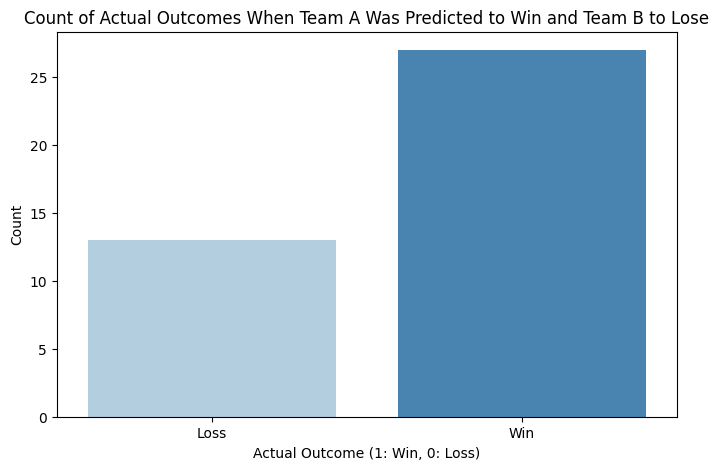

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count DataFrame for predictions and actual outcomes
prediction_outcomes = merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=prediction_outcomes.index, y=prediction_outcomes.values, palette='Blues')
plt.title('Count of Actual Outcomes When Team A Was Predicted to Win and Team B to Lose')
plt.xlabel('Actual Outcome (1: Win, 0: Loss)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
plt.show()


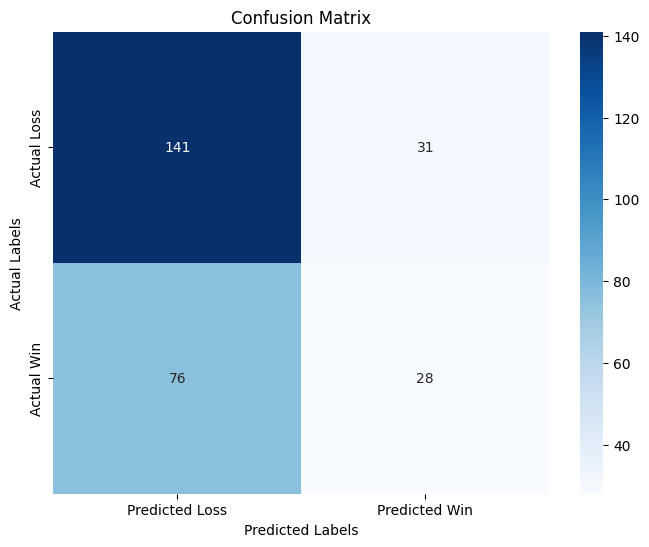

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(test["target"], preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Loss', 'Predicted Win'],
            yticklabels=['Actual Loss', 'Actual Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


<ipython-input-93-e9b8ca2cfb73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged, x='prediction_x', palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


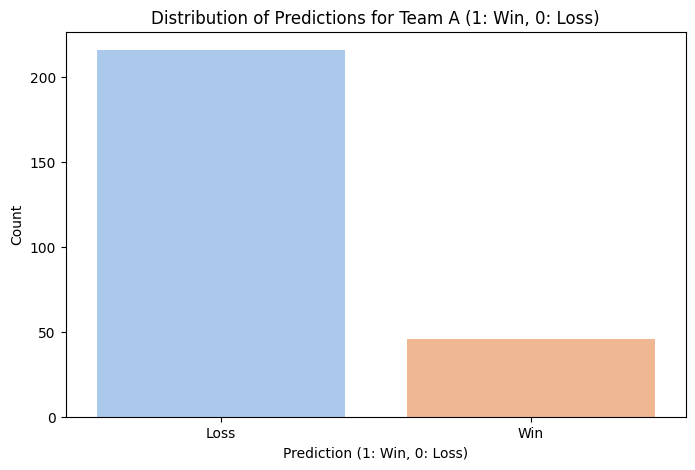

In [93]:
# Distribution of predictions
plt.figure(figsize=(8, 5))
sns.countplot(data=merged, x='prediction_x', palette='pastel')
plt.title('Distribution of Predictions for Team A (1: Win, 0: Loss)')
plt.xlabel('Prediction (1: Win, 0: Loss)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
plt.show()
